In [1]:
import numpy as np
from pynq import Overlay, allocate
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
overlay = Overlay("/home/xilinx/jupyter_notebooks/img_inv_blk/conv.bit")
overlay.ip_dict.keys()

dict_keys(['conv_0', 'axi_intc_0', 'processing_system7_0'])

In [3]:
image_path = "/home/xilinx/jupyter_notebooks/img_inv_blk/img_blk.jpg"
image = Image.open(image_path)
bw_image = image.convert('L')
ip_image = np.array(bw_image,dtype=int).flatten()
kern = np.array([0,-1,0,-1,5,-1,0,-1,0],dtype=int)

in_buff = allocate(shape=(10000,), dtype=int)
kern_buff = allocate(shape=(9,), dtype=int)
out_buff = allocate(shape=(10000,),dtype=int)
np.copyto(in_buff,ip_image)
np.copyto(kern_buff,kern)
print(in_buff)
print(kern_buff)

[160 158 159 ...  59  80 101]
[ 0 -1  0 -1  5 -1  0 -1  0]


In [4]:
my_ip = overlay.conv_0
reg_map = my_ip.register_map
reg_map

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0),
  a_1 = Register(a=write-only),
  a_2 = Register(a=write-only),
  b_1 = Register(b=write-only),
  b_2 = Register(b=write-only),
  c_1 = Register(c=write-only),
  c_2 = Register(c=write-only)
}

In [5]:
print("py_buffer physical address {}".format(hex(in_buff.physical_address)))

py_buffer physical address 0x16850000


In [11]:
hex(my_ip.read(0x0))

'0x81'

In [9]:
my_ip.register_map.a_1 = in_buff.physical_address
my_ip.register_map.b_1 = kern_buff.physical_address
my_ip.register_map.c_1 = out_buff.physical_address

In [10]:
my_ip.write(0x0,0x81)

In [23]:
my_ip.register_map.CTRL.AP_DONE

0

In [24]:
print(kern_buff)

[ 0 -1  0 -1  5 -1  0 -1  0]


In [25]:
print(in_buff)

[160 158 159 ...  59  80 101]


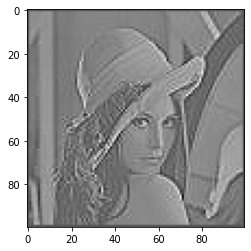

In [8]:
plt.imshow(out_buff.reshape(100,100),cmap="gray")
plt.show()

In [18]:
print(out_buff)

[0 0 0 ... 0 0 0]


In [19]:
out_buff

PynqBuffer([0, 0, 0, ..., 0, 0, 0])